In [11]:
# from google.colab import files 
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import math

In [13]:
dfCandBra = pd.read_csv('/content/drive/My Drive/datas/consulta_cand_2020_BRASIL.csv', sep=';', encoding='latin-1')
dfCandRs = pd.read_csv('/content/drive/My Drive/datas/consulta_cand_2020_RS.csv', sep=';', encoding='latin-1')
dfBensRs = pd.read_csv('/content/drive/My Drive/datas/bem_candidato_2020_RS.csv', sep=';', encoding='latin-1')

In [14]:
dfCandBra

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,21350,PILÕEZINHOS,13,VEREADOR,150001022661,15622,FRANCISCO DE ASSIS GRANGEIRO DA SILVA,ASSIS ROMEIRO,#NULO#,3319005480,MARCELOPLZ45@BOL.COM.BR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,150000122879,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,PB,-3,PILÕEZINHOS,09/12/1974,46,20693101295,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),5,INDÍGENA,601,AGRICULTOR,12308,-1,#NULO#,N,S,-1,6002779620206150047,-1,#NULO#,-1,#NULO#,SIM
1,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PR,78573,SANTO ANTÔNIO DO SUDOESTE,12,VICE-PREFEITO,160000973938,55,VALDIR OLDRA,VALDIR OLDRA,#NULO#,58109749968,FORCAINOVADORA2020@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,160000113484,FORÇA INOVADORA,PT / PTB / PSL / PSD,1,BRASILEIRA NATA,RS,-3,CAMPINAS DO SUL,19/09/1966,54,22446080671,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESÁRIO,-1,-1,#NULO#,N,S,-1,6002109320206160083,-1,#NULO#,-1,#NULO#,SIM
2,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,85995,CAXIAS DO SUL,13,VEREADOR,210000666400,65705,JAIR LUIZ DE OLIVEIRA,JAIR ÁRBITRO,#NULO#,28786343068,ARENA.GINESPORTES@YAHOO.COM.BR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,65,PC do B,PARTIDO COMUNISTA DO BRASIL,210000059632,PARTIDO ISOLADO,PC do B,1,BRASILEIRA NATA,RS,-3,CAXIAS DO SUL,31/03/1959,61,36136710493,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,122630,-1,#NULO#,N,S,-1,6000843820206210169,-1,#NULO#,-1,#NULO#,SIM
3,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PR,74357,ARAUCÁRIA,13,VEREADOR,160000673781,12770,JEANE ISLENA VASILEWSKI,JEANE ISLENA VASILEWSKI,#NULO#,11578318939,JEANEISLENAVAILEWSKI@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,160000060536,PARTIDO ISOLADO,PDT,1,BRASILEIRA NATA,PR,-3,ARAUCÁRIA,17/08/2000,20,113633550663,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",107201,-1,#NULO#,N,N,-1,6002386320206160050,-1,#NULO#,-1,#NULO#,SIM
4,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,MG,41670,BOTELHOS,13,VEREADOR,130000678280,22666,ROSANA GOMES PAULA,ROSANA VARREDEIRA,#NULO#,4298060608,LUIZINHODAMBULANCIA@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,130000061224,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,MG,-3,BOTELHOS,19/04/1972,48,94754810213,4,FEMININO,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,12308,-1,#NULO#,N,S,-1,6000495420206130055,-1,#NULO#,-1,#NULO#,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [15]:
dfCandRs

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,89273,TAQUARA,13,VEREADOR,210000680392,10000,CARLA CRISTINA MARTINS,CARLA MARTINS,#NULO#,88111261004,PRB10.TAQUARARS@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,10,REPUBLICANOS,REPUBLICANOS,210000061575,PARTIDO ISOLADO,REPUBLICANOS,1,BRASILEIRA NATA,RS,-3,TAQUARA,17/12/1974,46,61019970469,4,FEMININO,7,SUPERIOR INCOMPLETO,5,VIÚVO(A),1,BRANCA,411,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,18704,-1,#NULO#,N,S,-1,6002078720206210055,-1,#NULO#,-1,#NULO#,SIM
1,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,86851,GUAÍBA,13,VEREADOR,210001196347,70270,LAURA MARIA ALVES SEVERO,LAURA ENFERMEIRA,#NULO#,47533927087,AVANTEGUAIBA70@GMAIL.COM,3,INAPTO,14,INDEFERIDO,PARTIDO ISOLADO,70,AVANTE,AVANTE,210000147064,PARTIDO ISOLADO,AVANTE,1,BRASILEIRA NATA,RS,-3,BAGÉ,07/11/1959,61,26351500418,4,FEMININO,6,ENSINO MÉDIO COMPLETO,5,VIÚVO(A),1,BRANCA,113,ENFERMEIRO,51569,-1,#NULO#,N,N,-1,6004797320206210090,-1,#NULO#,-1,#NULO#,NÃO
2,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,86240,ELDORADO DO SUL,13,VEREADOR,210000755634,40777,ANDRE BORGES,DECO,#NULO#,1108384080,THAISALMARAQUINTANA2011@GMAIL.COM,3,INAPTO,14,INDEFERIDO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,210000071673,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,RS,-3,PORTO ALEGRE,20/12/1988,32,87337630400,2,MASCULINO,7,SUPERIOR INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,531,MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO D...,46643,-1,#NULO#,N,S,-1,6001843620206210090,-1,#NULO#,-1,#NULO#,NÃO
3,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,87009,MARIANA PIMENTEL,13,VEREADOR,210000687699,40123,ALESSANDRA BUDELON BAZILEWICZ,ALESSANDRA,#NULO#,2854755090,ALESSANDRABASILEWICZ@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,210000063168,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,RS,-3,GUAÍBA,03/09/1994,26,105517250493,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,243,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,12308,-1,#NULO#,N,S,-1,6000960920206210151,-1,#NULO#,-1,#NULO#,SIM
4,04/11/2020,12:07:15,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RS,86851,GUAÍBA,13,VEREADOR,210001068020,22111,FLAVIO OBERTI SILVA DA ROZA,FLAVIO ROZA,#NULO#,54939119068,FLAVIOROZA@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,210000129143,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,RS,-3,PORTO ALEGRE,15/05/1972,48,52845920434,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,9,DIVORCIADO(A),1,BRANCA,170,COMERCIÁRIO,51569,-1,#NULO#,N,S,-1,6004217020206210090,-1,#NULO#,-1,#NULO#,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [46]:
def show_values_on_bars(axs, h_v="v", space=0.4, altura=0.0, f=12, tipo=int):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + float(space)
                if math.isnan(p.get_height()):
                  value = tipo(0.0)
                else:
                  value = tipo(p.get_height())
                ax.text(_x, _y, value, ha="center", fontdict={'fontsize':f}) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if math.isnan(p.get_height()):
                  value = tipo(0.0)
                else:
                  value = tipo(p.get_width())
                ax.text(_x, _y-altura, value, ha="left", fontdict={'fontsize':f})

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

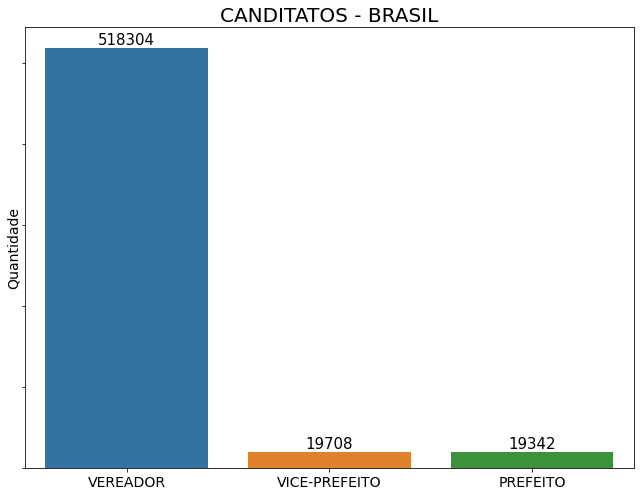

In [17]:
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=dfCandBra['DS_CARGO'].value_counts().index, y=dfCandBra['DS_CARGO'].value_counts(), ax=ax)

ax.set_title("CANDITATOS - BRASIL", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 5000.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)

fig.tight_layout();


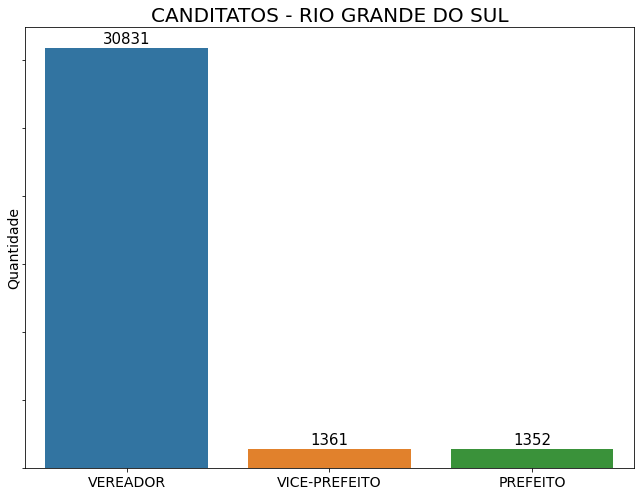

In [18]:
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=dfCandRs['DS_CARGO'].value_counts().index, y=dfCandRs['DS_CARGO'].value_counts(), ax=ax)

ax.set_title("CANDITATOS - RIO GRANDE DO SUL", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 400.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)

fig.tight_layout();

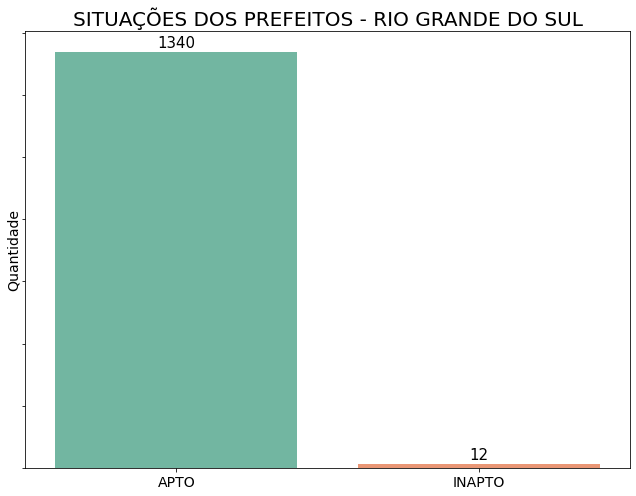

In [19]:
df = pd.DataFrame(dfCandRs.loc[dfCandRs['DS_CARGO'] == 'PREFEITO', ['DS_SITUACAO_CANDIDATURA']])
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_SITUACAO_CANDIDATURA'].value_counts().index, y=df['DS_SITUACAO_CANDIDATURA'].value_counts(), ax=ax, palette='Set2')

ax.set_title("SITUAÇÕES DOS PREFEITOS - RIO GRANDE DO SUL", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 15.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)

fig.tight_layout();

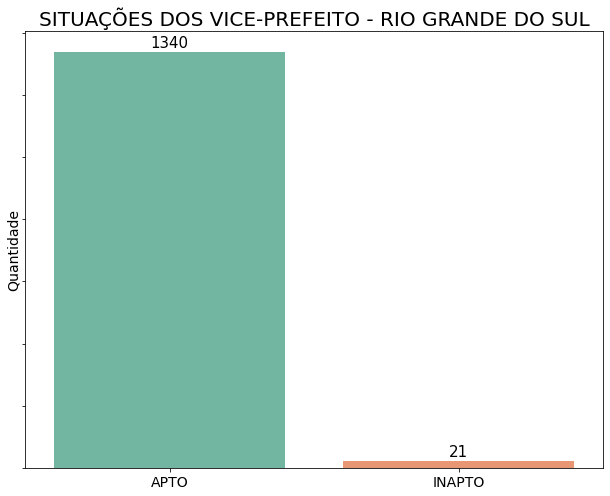

In [20]:
df = pd.DataFrame(dfCandRs.loc[dfCandRs['DS_CARGO'] == 'VICE-PREFEITO', ['DS_SITUACAO_CANDIDATURA']])
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_SITUACAO_CANDIDATURA'].value_counts().index, y=df['DS_SITUACAO_CANDIDATURA'].value_counts(), ax=ax, palette='Set2')

ax.set_title("SITUAÇÕES DOS VICE-PREFEITO - RIO GRANDE DO SUL", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 15.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)

fig.tight_layout();

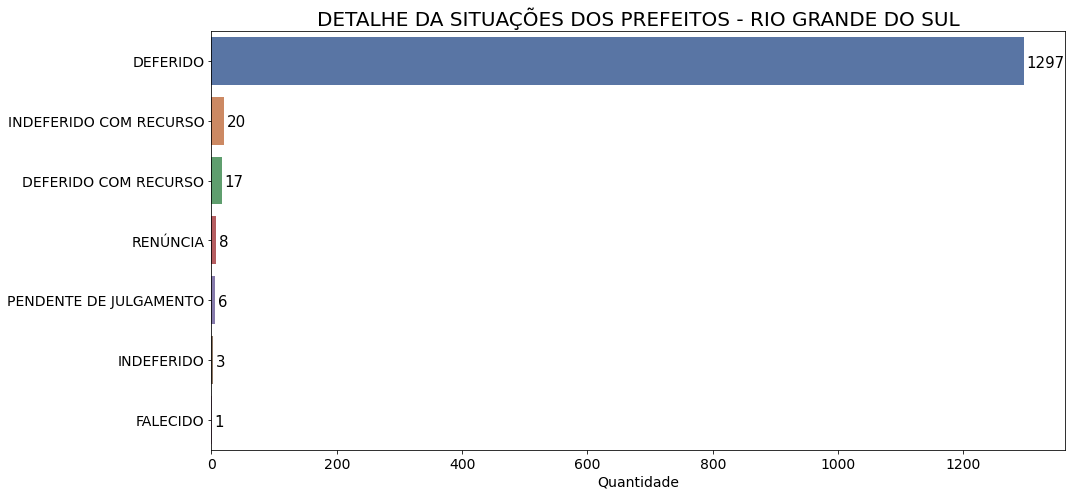

In [21]:
df = pd.DataFrame(dfCandRs.loc[dfCandRs['DS_CARGO'] == 'PREFEITO', ['DS_DETALHE_SITUACAO_CAND']])
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['DS_DETALHE_SITUACAO_CAND'].value_counts(), y=df['DS_DETALHE_SITUACAO_CAND'].value_counts().index, ax=ax, palette="deep")
ax.set_title("DETALHE DA SITUAÇÕES DOS PREFEITOS - RIO GRANDE DO SUL", fontdict={'fontsize':20})

ax.set_xlabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', 4.0, 0.3, f=15)

ax.tick_params(labelsize=14)

fig.tight_layout();

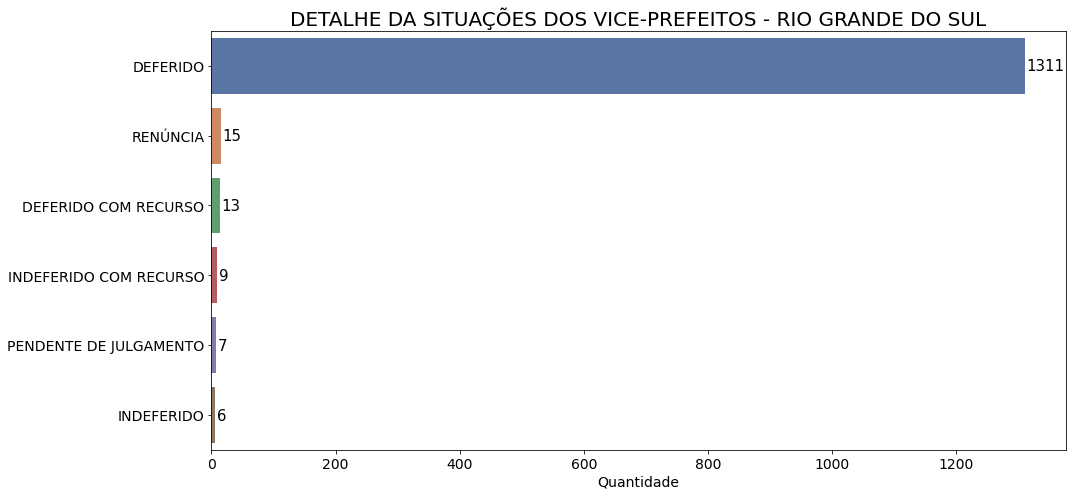

In [22]:
df = pd.DataFrame(dfCandRs.loc[dfCandRs['DS_CARGO'] == 'VICE-PREFEITO', ['DS_DETALHE_SITUACAO_CAND']])
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['DS_DETALHE_SITUACAO_CAND'].value_counts(), y=df['DS_DETALHE_SITUACAO_CAND'].value_counts().index, ax=ax, palette="deep")
ax.set_title("DETALHE DA SITUAÇÕES DOS VICE-PREFEITOS - RIO GRANDE DO SUL", fontdict={'fontsize':20})

ax.set_xlabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', 3.0, 0.33, f=15)

ax.tick_params(labelsize=14)

fig.tight_layout();

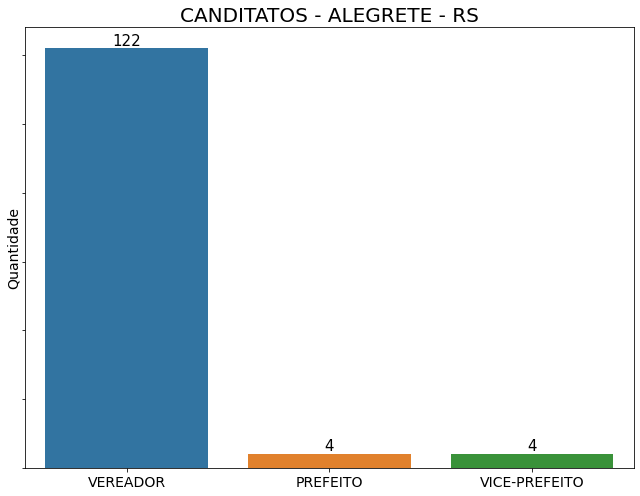

In [349]:
df = pd.DataFrame(dfCandRs.loc[dfCandRs['NM_UE']=='ALEGRETE', ['DS_CARGO']])
df['DS_CARGO'].value_counts()
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_CARGO'].value_counts().index, y=df['DS_CARGO'].value_counts(), ax=ax)

ax.set_title("CANDITATOS - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 1.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)
fig.tight_layout();

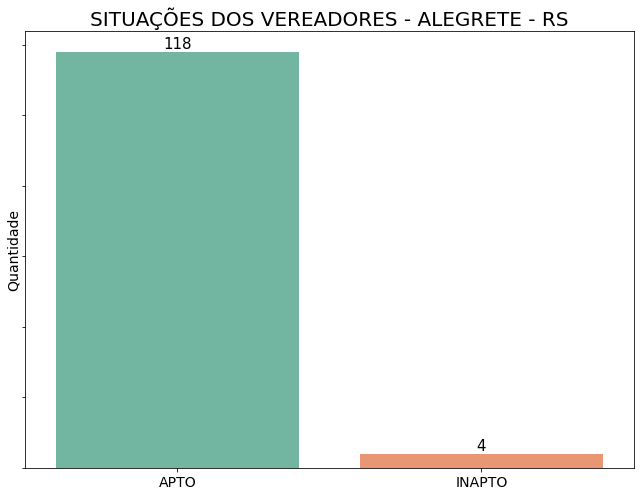

In [23]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE'), ['DS_SITUACAO_CANDIDATURA']])
df.value_counts()
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_SITUACAO_CANDIDATURA'].value_counts().index, y=df['DS_SITUACAO_CANDIDATURA'].value_counts(), ax=ax, palette='Set2')

ax.set_title("SITUAÇÕES DOS VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 1.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)
fig.tight_layout();

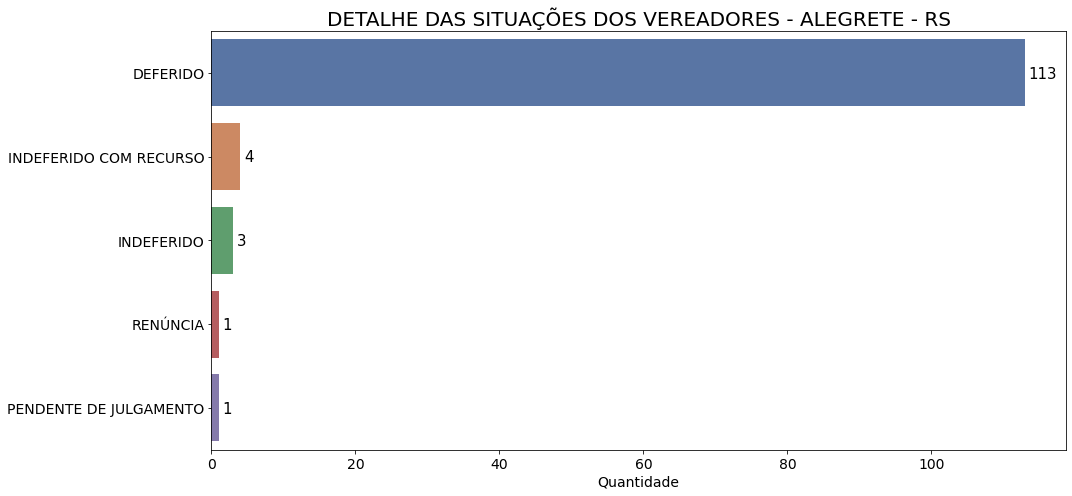

In [24]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE'), ['DS_DETALHE_SITUACAO_CAND']])
df.value_counts()
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['DS_DETALHE_SITUACAO_CAND'].value_counts(), y=df['DS_DETALHE_SITUACAO_CAND'].value_counts().index, ax=ax, palette="deep")
ax.set_title("DETALHE DAS SITUAÇÕES DOS VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', 0.5, 0.34, f=15)

ax.tick_params(labelsize=14)

fig.tight_layout();

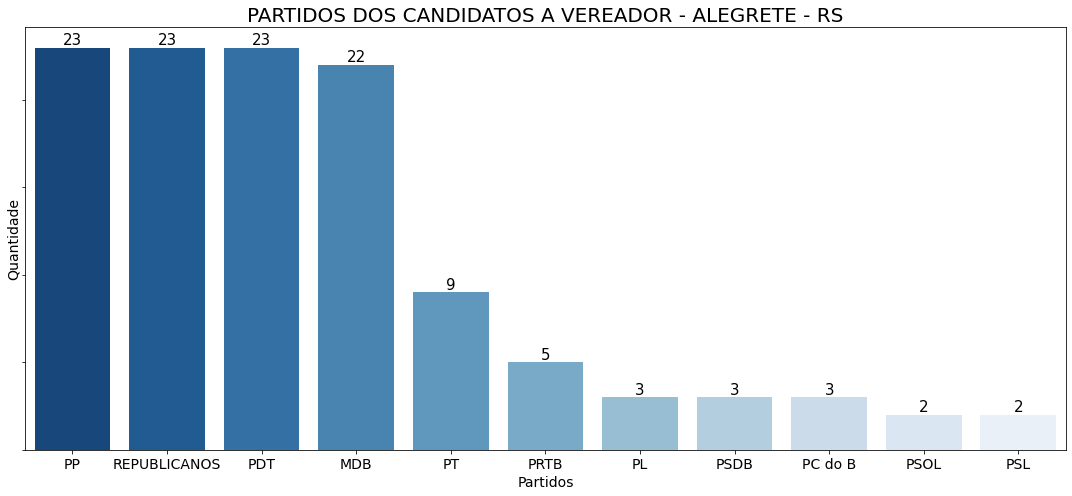

In [28]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['SG_PARTIDO']])
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x=df['SG_PARTIDO'].value_counts().index, y=df['SG_PARTIDO'].value_counts(), ax=ax, palette='Blues_r')

ax.set_title("PARTIDOS DOS CANDIDATOS A VEREADOR - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})
ax.set_xlabel('Partidos', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 0.2, f=15)

ax.tick_params(labelleft=False, labelsize=14)

fig.tight_layout();

In [25]:
dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'PREFEITO') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['NM_URNA_CANDIDATO', 'TP_AGREMIACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SG_PARTIDO', 'DS_GENERO']]


,NM_URNA_CANDIDATO,TP_AGREMIACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,SG_PARTIDO,DS_GENERO
4841,JETTER,COLIGAÇÃO,"FORÇA PARA TRABALHAR , ATITUDE PARA FAZER",PP / PDT / REPUBLICANOS / PSDB / PTB,PP,MASCULINO
13651,MÁRCIO AMARAL,COLIGAÇÃO,ALEGRETE NO RUMO CERTO,MDB / PL / PSL / DEM / PODE,MDB,MASCULINO
23755,MARIA DO HORTO,COLIGAÇÃO,NOSSA ALEGRETE CUIDADORA E SOLIDÁRIA,PT / PSB / PC do B,PT,FEMININO
25680,VÂNIA GUERRA,PARTIDO ISOLADO,PARTIDO ISOLADO,PRTB,PRTB,FEMININO


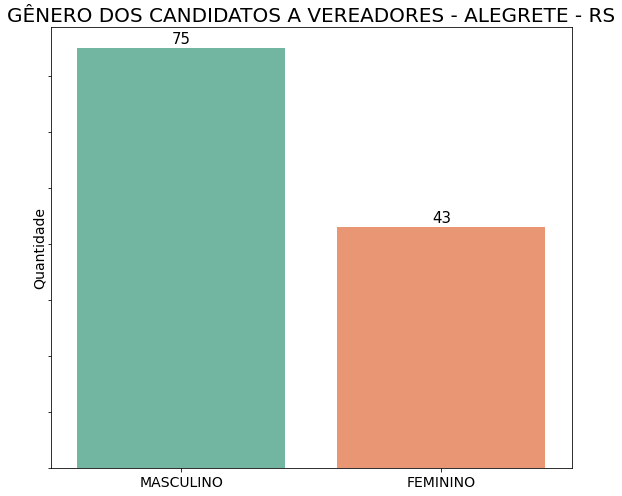

In [29]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE'] == 'ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_GENERO']])
df.value_counts()

fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_GENERO'].value_counts().index, y=df['DS_GENERO'].value_counts(), ax=ax, palette='Set2')

ax.set_title("GÊNERO DOS CANDIDATOS A VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 1.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)
fig.tight_layout();

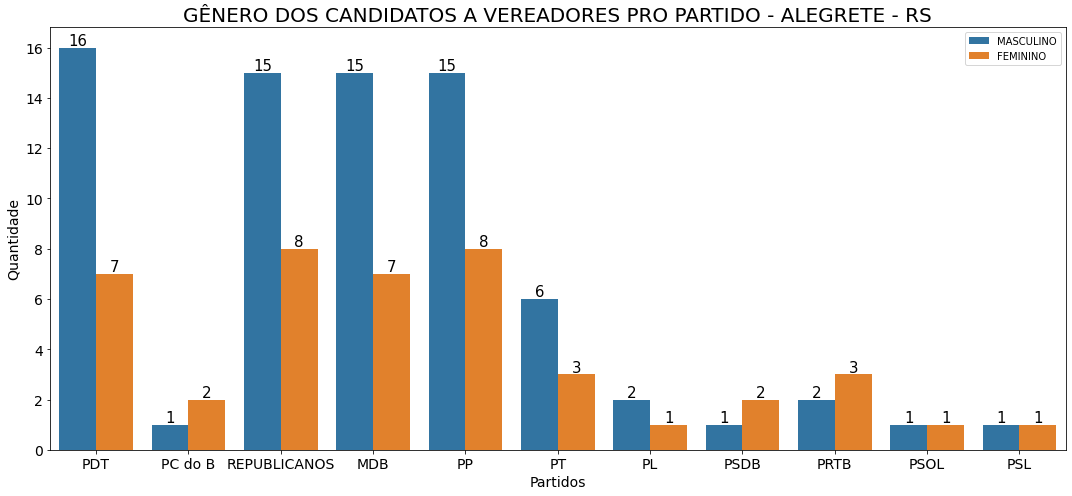

In [38]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE'] == 'ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_GENERO', 'SG_PARTIDO']])

fig, ax = plt.subplots(figsize=(15,7))

sns.countplot(data=df, x='SG_PARTIDO', hue='DS_GENERO', ax=ax)

ax.set_title("GÊNERO DOS CANDIDATOS A VEREADORES PRO PARTIDO - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Partidos', fontdict={'fontsize':14})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 0.1, 0.1, f=15)

ax.tick_params(labelsize=14)
ax.legend(loc='upper right')
fig.tight_layout();

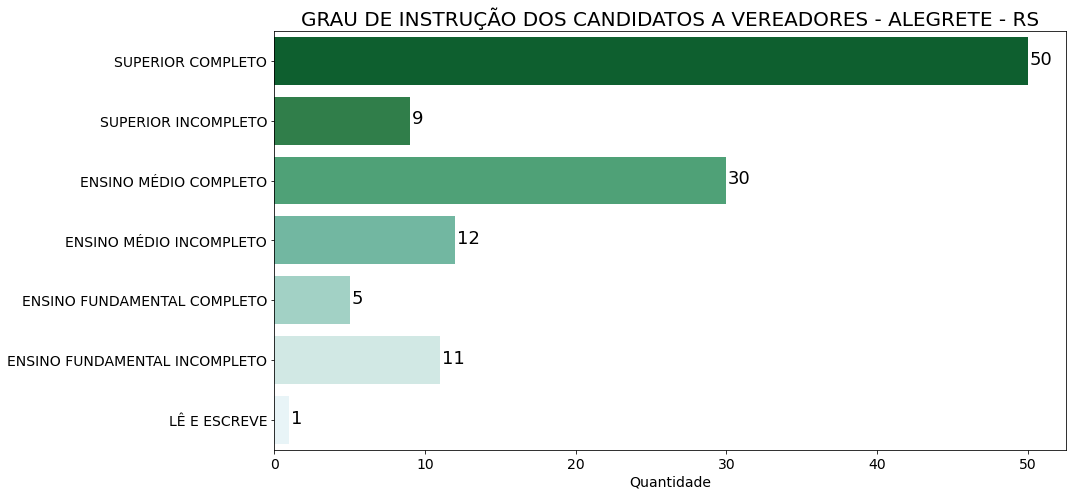

In [33]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_GRAU_INSTRUCAO']])
df.value_counts()
fig, ax = plt.subplots(figsize=(15,7))
l = ['SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO', 'ENSINO MÉDIO COMPLETO', 'ENSINO MÉDIO INCOMPLETO', 'ENSINO FUNDAMENTAL COMPLETO', 'ENSINO FUNDAMENTAL INCOMPLETO', 'LÊ E ESCREVE']
sns.barplot(x=df['DS_GRAU_INSTRUCAO'].value_counts(), y=df['DS_GRAU_INSTRUCAO'].value_counts().index, palette='BuGn_r', ax=ax, order=l)
# ax.invert_yaxis()
ax.set_title("GRAU DE INSTRUÇÃO DOS CANDIDATOS A VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', 0.1, 0.35, f=18)

ax.tick_params(labelsize=14)

fig.tight_layout();


In [357]:
df = pd.DataFrame(dfCandRs.loc[((dfCandRs['DS_CARGO'] == 'PREFEITO') | (dfCandRs['DS_CARGO'] == 'VICE-PREFEITO')) & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_CARGO','DS_GRAU_INSTRUCAO']])
df

,DS_CARGO,DS_GRAU_INSTRUCAO
4841,PREFEITO,SUPERIOR COMPLETO
6610,VICE-PREFEITO,SUPERIOR COMPLETO
9851,VICE-PREFEITO,SUPERIOR COMPLETO
13651,PREFEITO,SUPERIOR COMPLETO
23755,PREFEITO,SUPERIOR COMPLETO
25680,PREFEITO,SUPERIOR COMPLETO
30330,VICE-PREFEITO,SUPERIOR COMPLETO
32133,VICE-PREFEITO,SUPERIOR COMPLETO


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

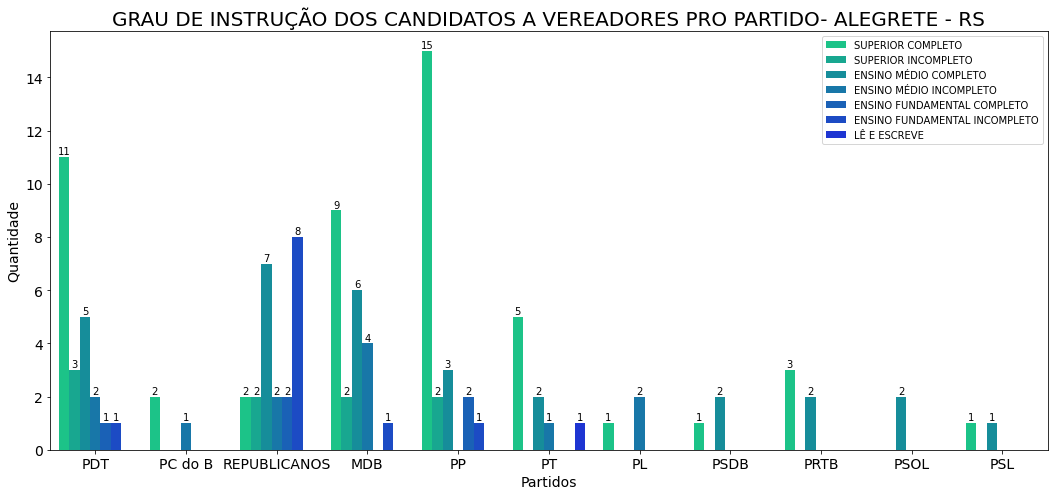

In [48]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_GRAU_INSTRUCAO', 'SG_PARTIDO']])


# dfCandRs['DS_GRAU_INSTRUCAO'].value_counts()

l = ['SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO', 'ENSINO MÉDIO COMPLETO', 'ENSINO MÉDIO INCOMPLETO', 'ENSINO FUNDAMENTAL COMPLETO', 'ENSINO FUNDAMENTAL INCOMPLETO', 'LÊ E ESCREVE']

fig, ax = plt.subplots(figsize=(15,7))

sns.countplot(data=df, x='SG_PARTIDO', hue='DS_GRAU_INSTRUCAO', palette='winter_r', hue_order=l)

ax.set_title("GRAU DE INSTRUÇÃO DOS CANDIDATOS A VEREADORES PRO PARTIDO- ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Partidos', fontdict={'fontsize':14})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 0.1, 0, f=10)

ax.tick_params(labelsize=14)
ax.legend(loc='upper right')
fig.tight_layout();


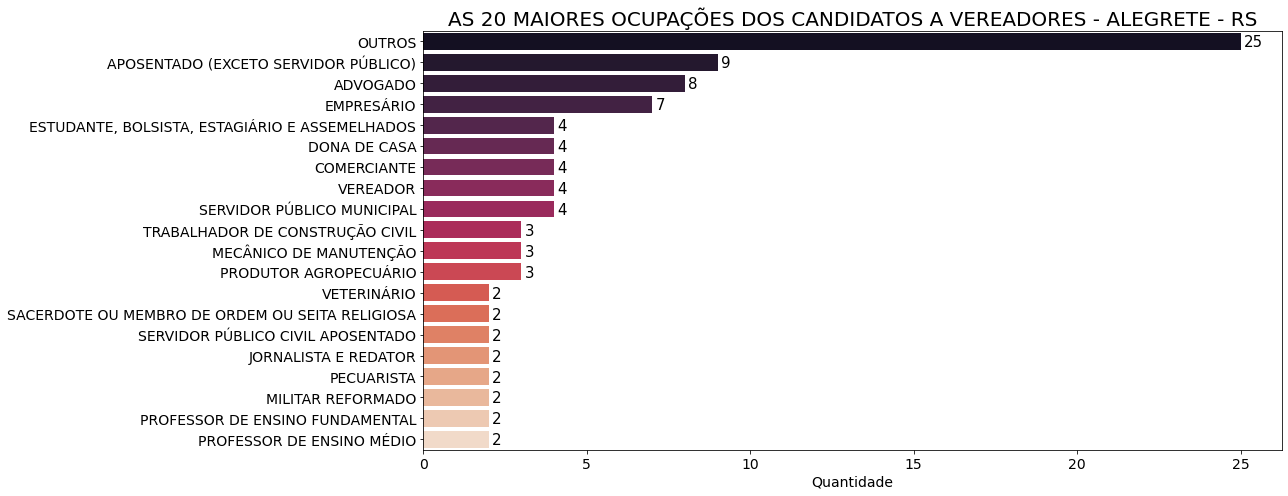

In [72]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_OCUPACAO']])
# df = df.value_counts().rename_axis('DS_OCUPACAO').reset_index(name='counts')
# df.groupby('counts').sum().value_counts()
# df.value_counts()
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x=df['DS_OCUPACAO'].value_counts().head(20), y=df['DS_OCUPACAO'].value_counts().head(20).index, palette='rocket', ax=ax)
# ax.invert_yaxis()
ax.set_title("AS 20 MAIORES OCUPAÇÕES DOS CANDIDATOS A VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})

ax.set_xlabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', 0.1, 0.15, f=15)

ax.tick_params(labelsize=14)

fig.tight_layout();

In [73]:
df = pd.DataFrame(dfCandRs.loc[((dfCandRs['DS_CARGO'] == 'PREFEITO') | (dfCandRs['DS_CARGO'] == 'VICE-PREFEITO')) & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_CARGO','DS_OCUPACAO']])
df

,DS_CARGO,DS_OCUPACAO
4841,PREFEITO,ENGENHEIRO
6610,VICE-PREFEITO,ADMINISTRADOR
9851,VICE-PREFEITO,EMPRESÁRIO
13651,PREFEITO,VETERINÁRIO
23755,PREFEITO,ASSISTENTE SOCIAL
25680,PREFEITO,PRODUTOR AGROPECUÁRIO
30330,VICE-PREFEITO,MILITAR REFORMADO
32133,VICE-PREFEITO,VEREADOR


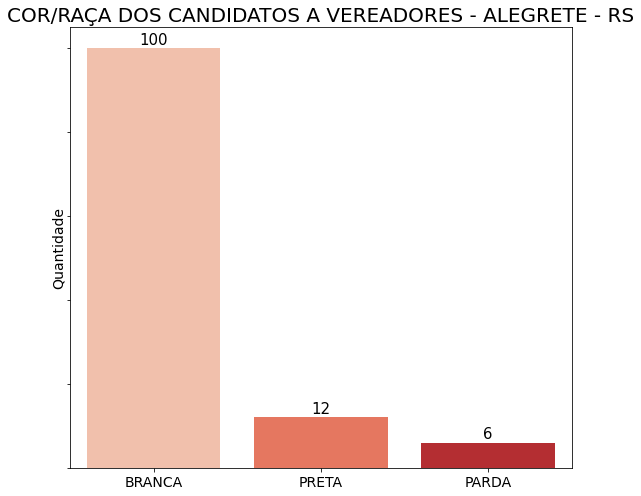

In [77]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_COR_RACA']])
df.value_counts()
fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=df['DS_COR_RACA'].value_counts().index, y=df['DS_COR_RACA'].value_counts(), ax=ax, palette='Reds')

ax.set_title("COR/RAÇA DOS CANDIDATOS A VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 1.0, f=15)

ax.tick_params(labelleft=False, labelsize=14)
fig.tight_layout();

In [362]:
df = pd.DataFrame(dfCandRs.loc[((dfCandRs['DS_CARGO'] == 'PREFEITO') | (dfCandRs['DS_CARGO'] == 'VICE-PREFEITO')) & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_CARGO','DS_COR_RACA']])
df

,DS_CARGO,DS_COR_RACA
4841,PREFEITO,BRANCA
6610,VICE-PREFEITO,BRANCA
9851,VICE-PREFEITO,BRANCA
13651,PREFEITO,BRANCA
23755,PREFEITO,BRANCA
25680,PREFEITO,BRANCA
30330,VICE-PREFEITO,BRANCA
32133,VICE-PREFEITO,BRANCA


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

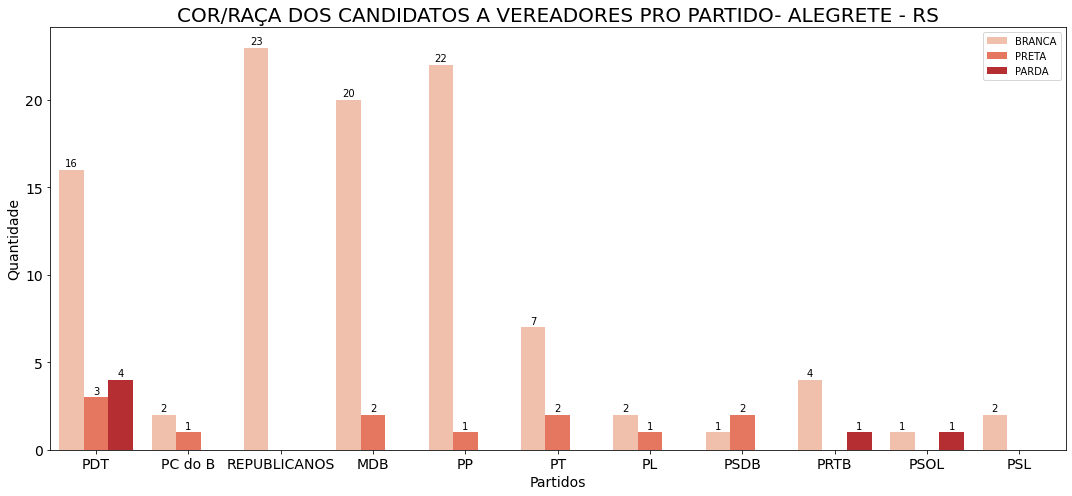

In [78]:
df = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['DS_COR_RACA', 'SG_PARTIDO']])

fig, ax = plt.subplots(figsize=(15,7))

sns.countplot(data=df, x='SG_PARTIDO', hue='DS_COR_RACA', palette='Reds')

ax.set_title("COR/RAÇA DOS CANDIDATOS A VEREADORES PRO PARTIDO- ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Partidos', fontdict={'fontsize':14})
ax.set_ylabel('Quantidade', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 0.2, 0, f=10)

ax.tick_params(labelsize=14)
ax.legend(loc='upper right')
fig.tight_layout();

In [364]:
dfBensRs

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,87157,ITATIBA DO SUL,210000631794,1,21,"Veículo automotor terrestre: caminhão, automóv...","GM Montana, 2009/2010, Placa IQM1373","17000,00",27/10/2020,09:24:13
1,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,87157,ITATIBA DO SUL,210000631794,2,21,"Veículo automotor terrestre: caminhão, automóv...","Ford F1000, 1977, Placa IIW2727","10000,00",27/10/2020,09:24:13
2,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,87157,ITATIBA DO SUL,210000631794,3,19,Outros bens imóveis,"Terreno com construção, localizado na Avenida ...","135000,00",27/10/2020,09:24:13
3,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,87157,ITATIBA DO SUL,210000631794,4,12,Casa,"Terreno com duas casas, localizado na Avenida ...","190000,00",27/10/2020,09:24:13
4,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,87157,ITATIBA DO SUL,210000631794,5,21,"Veículo automotor terrestre: caminhão, automóv...","Fiat Fiorino, 2002, Placa DGL9043","7000,00",27/10/2020,09:24:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98762,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,88374,SANTA BÁRBARA DO SUL,210001274621,2,21,"Veículo automotor terrestre: caminhão, automóv...",Um carro Renault Clio.,"10000,00",04/11/2020,09:48:25
98763,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,88935,SÃO SEBASTIÃO DO CAÍ,210001275295,1,32,Quotas ou quinhões de capital,CAPITAL SOCIAL MEI,"1,00",28/10/2020,16:36:40
98764,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,88935,SÃO SEBASTIÃO DO CAÍ,210001275295,2,21,"Veículo automotor terrestre: caminhão, automóv...",UMA MOTONETA YAMAHA/CY 50 JOG ANO/MOD 1994/1995,"3000,00",28/10/2020,16:36:40
98765,04/11/2020,12:06:47,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RS,88935,SÃO SEBASTIÃO DO CAÍ,210001275295,3,11,Apartamento,APTO EDIFICIO RESIDENCIAL COUNTRY,"48350,00",28/10/2020,16:36:40


In [ ]:
# dfBensRs['DS_TIPO_BEM_CANDIDATO'].value_counts()

In [79]:
dfc = pd.DataFrame(dfCandRs.loc[((dfCandRs['DS_CARGO'] == 'PREFEITO')) & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']])
candKey = dfc['SQ_CANDIDATO'].values
dfc
v = []
for c in candKey:
  dfb = dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == c, ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]
  dfb['VR_BEM_CANDIDATO'] = dfb['VR_BEM_CANDIDATO'].apply(lambda x: str(x).replace(',','.'))
  dfb['VR_BEM_CANDIDATO'] = dfb['VR_BEM_CANDIDATO'].astype(float)
  v.append(format(dfb['VR_BEM_CANDIDATO'].sum(), '.2f'))
dfc['sum_values'] = pd.Series(np.array(v), index=dfc.index)
dfc['sum_values'] = dfc['sum_values'].astype(float)
dfc['nome_partido'] = dfc[['NM_URNA_CANDIDATO', 'SG_PARTIDO']].agg(' - '.join, axis=1)

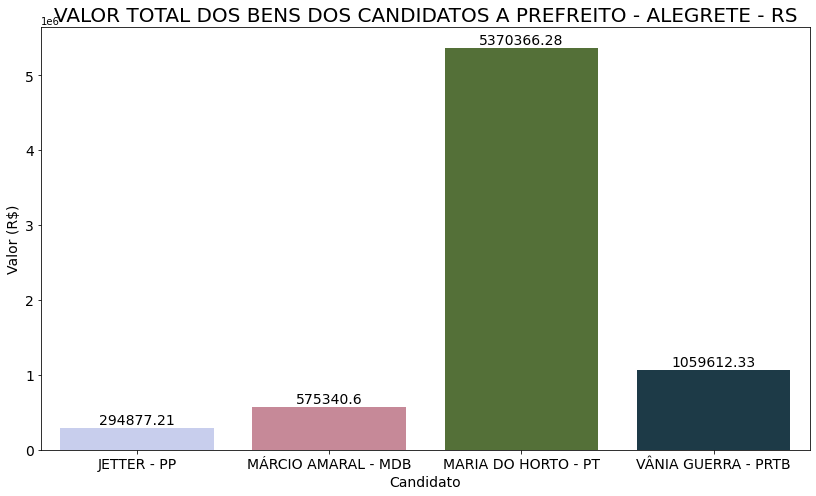

In [80]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(data=dfc, x='nome_partido', y='sum_values', ax=ax, palette='cubehelix_r')

ax.set_title("VALOR TOTAL DOS BENS DOS CANDIDATOS A PREFREITO - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Valor (R$)', fontdict={'fontsize':14})
ax.set_xlabel('Candidato', fontdict={'fontsize':14})
show_values_on_bars(ax, 'v', 50000.0, f=14, tipo=float)

ax.tick_params(labelsize=14)
fig.tight_layout();

In [82]:
dfc.loc[dfc['SQ_CANDIDATO']==candKey[0], ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']]

,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO
4841,210000659146,JETTER,PP


In [83]:
dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == candKey[0], ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
9564,210000659146,Casa,"UMA CASA DE ALVENARIA , SITUADA NA RUA MARECHA...","145877,21"
9565,210000659146,Terreno,"TERRENO EM SANTA ROSA , NA RUA FRANCISCO TIMM,...","90000,00"
9566,210000659146,"Veículo automotor terrestre: caminhão, automóv...",CAMINHONETA RENAULT/ DUSTER 16D4X4FLEXANO 2013...,"59000,00"


In [84]:
dfc.loc[dfc['SQ_CANDIDATO']==candKey[1], ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']]

,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO
13651,210000765813,MÁRCIO AMARAL,MDB


In [85]:
dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == candKey[1], ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
37049,210000765813,OUTROS BENS E DIREITOS,Conta Investimento no Banco Sicredi - Agência ...,"625,95"
37050,210000765813,"Veículo automotor terrestre: caminhão, automóv...",Veículo Duster Dynamic - Ano 2013 - RENAVAM 00...,"40000,00"
37051,210000765813,OUTROS BENS E DIREITOS,Conta Corrente no Banco Sicredi Pampa Gaúcho -...,"2242,87"
37052,210000765813,OUTROS BENS E DIREITOS,Conta Corrente no Banco Banrisul - Agência 011...,"385,48"
37053,210000765813,OUTROS BENS E DIREITOS,Conta Corrente no Banco Caixa Econômica Federa...,"18086,30"
37054,210000765813,Apartamento,Apartamento no Edifício San Remo com a matrícu...,"514000,00"


In [86]:
dfc.loc[dfc['SQ_CANDIDATO']==candKey[2], ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']]

,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO
23755,210000742150,MARIA DO HORTO,PT


In [87]:
dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == candKey[2], ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
29720,210000742150,"Aplicação de renda fixa (CDB, RDB e outros)",CDB,"1850,40"
29721,210000742150,Casa,"CASA SITUADA NA RUA BARÃO DO CERRO LARGO, 821","700000,00"
29722,210000742150,Apartamento,APARTAMENTO 301 DO ED. PALAZZO DORO EM SANTA M...,"180000,00"
29723,210000742150,Terra nua,"386,5 HA DE CAMPO NA LOCALIDADE DO CARAGUATAÍ ...","3865300,00"
29724,210000742150,Terra nua,"47,45HA DE CAMPO NO RINCÃO DE SÃO MIGUEL - ALE...","478800,00"
29725,210000742150,"Veículo automotor terrestre: caminhão, automóv...","VEÍCULO PRISMA LTZ 1.4 2018, COR BRANCA PLACAS...","65400,00"
29726,210000742150,VGBL - Vida Gerador de Benefício Livre,BRASIL PREV,"37000,00"
29727,210000742150,Consórcio não contemplado,CONSÓRCIO DE AUTOMÓVEL,"27199,85"
29728,210000742150,Caderneta de poupança,POUPANÇA OURO,"14816,03"


In [88]:
dfc.loc[dfc['SQ_CANDIDATO']==candKey[3], ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']]

,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO
25680,210000644121,VÂNIA GUERRA,PRTB


In [89]:
dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == candKey[3], ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
4848,210000644121,Bem relacionado com o exercício da atividade a...,680 cabeças de gado,"561600,00"
4849,210000644121,Terra nua,Fração de campo 150ha havida por herança cfe p...,"450000,00"
4850,210000644121,"Veículo automotor terrestre: caminhão, automóv...","Caminhoneta Fiat Estrada Trek ce 1,6 placa 027...","31313,00"
4851,210000644121,Caderneta de poupança,Poupança Ouro Banco do Brasil CNPJ 00000000/01...,"0,29"
4852,210000644121,Depósito bancário em conta corrente no País,Banrisul,"3358,83"
4853,210000644121,Depósito bancário em conta corrente no País,BAnco Sicredi,"13149,63"
4854,210000644121,Depósito bancário em conta corrente no País,Banco do Brasil,"0,00"
4855,210000644121,Quotas ou quinhões de capital,Conta Capital Banco Sicredi Pampa GAúcho CNPJ ...,"190,58"


In [90]:
dfc = pd.DataFrame(dfCandRs.loc[(dfCandRs['DS_CARGO'] == 'VEREADOR') & (dfCandRs['NM_UE']=='ALEGRETE') & (dfCandRs['DS_SITUACAO_CANDIDATURA'] == 'APTO'), ['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']])
candKey = dfc['SQ_CANDIDATO'].values
v = []
for c in candKey:
  dfb = dfBensRs.loc[dfBensRs['SQ_CANDIDATO'] == c, ['SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']]
  dfb['VR_BEM_CANDIDATO'] = dfb['VR_BEM_CANDIDATO'].apply(lambda x: str(x).replace(',','.'))
  dfb['VR_BEM_CANDIDATO'] = dfb['VR_BEM_CANDIDATO'].astype(float)
  v.append(format(dfb['VR_BEM_CANDIDATO'].sum(), '.2f'))
dfc['sum_values'] = pd.Series(np.array(v), index=dfc.index)
dfc['sum_values'] = dfc['sum_values'].astype(float)
dfc['nome_partido'] = dfc[['NM_URNA_CANDIDATO', 'SG_PARTIDO']].agg(' - '.join, axis=1)

In [91]:
dfc.loc[dfc['sum_values'] == 0.0, ['sum_values']].value_counts()

sum_values
0.0           45
dtype: int64

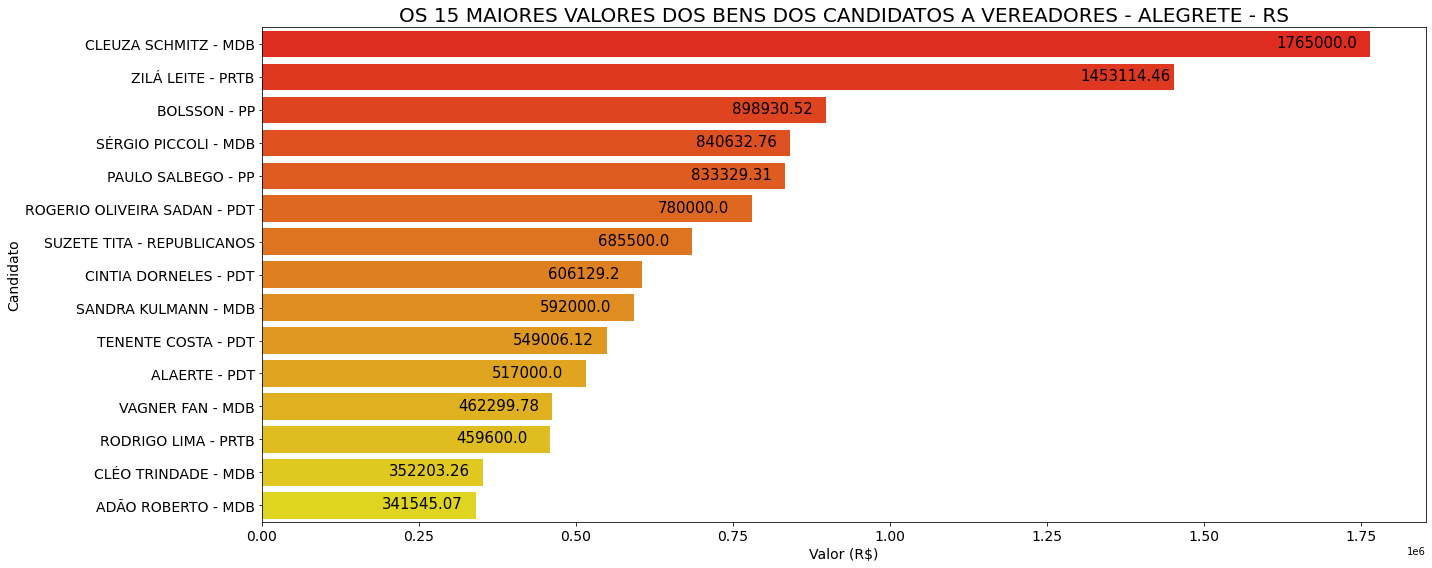

In [93]:
df = dfc.sort_values(by='sum_values', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(data=df, y='nome_partido', x='sum_values', ax=ax, palette='autumn')

ax.set_title("OS 15 MAIORES VALORES DOS BENS DOS CANDIDATOS A VEREADORES - ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_xlabel('Valor (R$)', fontdict={'fontsize':14})
ax.set_ylabel('Candidato', fontdict={'fontsize':14})

show_values_on_bars(ax, 'h', -150000.0, 0.3, f=15, tipo=str)

ax.tick_params(labelsize=14)
fig.tight_layout();

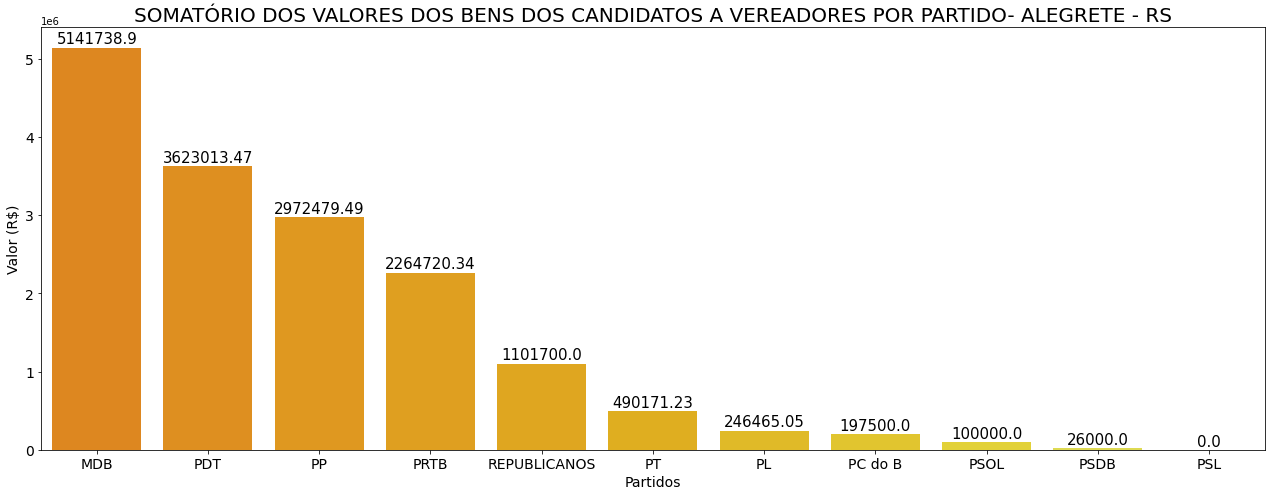

In [96]:
df = pd.DataFrame(dfc.groupby('SG_PARTIDO')['sum_values'].sum())
df.reset_index(inplace=True)
df = df.sort_values(by='sum_values', ascending=False)
df['sum_values'] = df['sum_values'].apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(18,7))

sns.barplot(data=df, y='sum_values', x='SG_PARTIDO',  ax=ax, palette='Wistia_r')

ax.set_title("SOMATÓRIO DOS VALORES DOS BENS DOS CANDIDATOS A VEREADORES POR PARTIDO- ALEGRETE - RS", fontdict={'fontsize':20})
ax.set_ylabel('Valor (R$)', fontdict={'fontsize':14})
ax.set_xlabel('Partidos', fontdict={'fontsize':14})

show_values_on_bars(ax, 'v', 50000.0, 0.3, f=15, tipo=str)

ax.tick_params(labelsize=14)
fig.tight_layout();